# Pandas DataFrame
- DataFrame 생성
- column 변경
- element 접근
- 필터링 / 슬라이싱 / 정렬
- 데이터 변경 / 추가 / 삭제
- 통계
- 시각화

# DataFrame 

- DataFrame은 `2차원 테이블 형태`의 데이터 구조로, `행`과 `열`로 이루어져 있습니다. 
- DataFrame은 `여러 개의 Series`로 구성되어 있으며, 각 `Series`는 하나의 `열(column)`을 나타냅니다. 
- DataFrame은 여러 데이터 타입을 포함할 수 있으며, 각 열은 서로 다른 데이터 타입을 가질 수 있습니다.

## 하나의 Series를 데이터 프레임으로 변환

In [3]:
import pandas as pd
s = pd.Series([1,2,3], index=list("ABC"))
s.name = "grade"
s.index.name = "name"
print(s)

name
A    1
B    2
C    3
Name: grade, dtype: int64


In [4]:
# to_frame() 활용
print(type(s.to_frame()), end="\n----\n")
s.to_frame()

<class 'pandas.core.frame.DataFrame'>
----


,grade
name,
A,1
B,2
C,3


In [5]:
# reset_index() 활용
s.reset_index()

,name,grade
0,A,1
1,B,2
2,C,3


## Series를 pd.concat으로 결합하는 방법

In [6]:
"""
판다스 시리즈를 활용한 데이터프레임 생성
"""
import pandas as pd

# 시리즈 생성
names = pd.Series(['Alice', 'Bob', 'Charlie'], name="Name")
ages = pd.Series([25, 30, 35], name="Age")
scores = pd.Series([85.5, 92.0, 78.5], name="Score")

# 시리즈들을 열방향으로 결합하여 데이터프레임 생성
df = pd.concat([names, ages, scores], axis=1)
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [7]:
# 시리즈를 행 방향으로 결함
pd.concat([names, ages, scores])

0      Alice
1        Bob
2    Charlie
0         25
1         30
2         35
0       85.5
1       92.0
2       78.5
dtype: object

In [8]:
type(pd.concat([names, ages, scores]))

pandas.core.series.Series

## 딕셔너리를 활용하는 방법

In [9]:
"""
판다스 시리즈를 활용한 데이터프레임 생성 2
"""
import pandas as pd

# 시리즈 생성
names = pd.Series(['Alice', 'Bob', 'Charlie'])
ages = pd.Series([25, 30, 35])
scores = pd.Series([85.5, 92.0, 78.5])

# 데이터프레임 생성 (열 이름을 지정)
df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Score': scores
})
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [10]:
"""
딕셔너리를 활용한 데이터프레임 생성:
"""
import pandas as pd

# 딕셔너리를 사용하여 데이터프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'], # 열
    'Age': [25, 30, 35],                 # 열
    'Score': [85.5, 92.0, 78.5]          # 열
}

df = pd.DataFrame(data)
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


## 배열을 활용하는 방법

In [11]:
"""
딕셔너리의 리스트를 활용한 데이터프레임 생성:
"""
import pandas as pd

# 리스트의 리스트를 사용하여 데이터프레임 생성
data = [
    {'name':'Alice', 'Age':25, 'Score':85.5},
    {'name':'Bob', 'Age':30, 'Score':92.0},
    {'name':'Charlie', 'Age':35, 'Score':78.5, "Gender":"Male"}
]

df = pd.DataFrame(data)
df
    

,name,Age,Score,Gender
0,Alice,25,85.5,NaN
1,Bob,30,92.0,NaN
2,Charlie,35,78.5,Male


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   Age     3 non-null      int64  
 2   Score   3 non-null      float64
 3   Gender  1 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 224.0+ bytes


In [13]:
"""
리스트의 리스트를 활용한 데이터프레임 생성:\
"""
import pandas as pd

# 리스트의 리스트를 사용하여 데이터프레임 생성
data = [
    ['Alice', 25, 85.5],  # 행
    ['Bob', 30, 92.0],    # 행
    ['Charlie', 35, 78.5] # 행
]

df = pd.DataFrame(data)
df

,0,1,2
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [14]:
df.columns=["Name", "Age", "Score"]
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [15]:
df = pd.DataFrame(data, columns=["Name", "Age", "Score"])
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      int64  
 2   Score   3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


## 파일로 부터 데이터프레임 만들기

In [17]:
"""
파일로 부터 읽어오기
"""
import pandas as pd

df = pd.read_csv("sample.csv", )

In [18]:
# pandas 에서 제공하는 read_XXX 함수 목록
list(filter(lambda x: x.startswith("read"), dir(pd)))

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml']

## 데이터프레임 주요 속성 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    3 non-null      object 
 1   Age     3 non-null      int64  
 2   Score   3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


In [20]:
df.T

,0,1,2
Name,Alice,Bob,Charlie
Age,25,30,35
Score,85.5,92.0,78.5


In [21]:
df.transpose()

,0,1,2
Name,Alice,Bob,Charlie
Age,25,30,35
Score,85.5,92.0,78.5


In [22]:
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [25]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [26]:
df.columns

Index(['Name', 'Age', 'Score'], dtype='object')

In [27]:
df.size

9

In [28]:
df.shape

(3, 3)

In [29]:
df.describe()

,Age,Score
count,3.0,3.000000
mean,30.0,85.333333
std,5.0,6.751543
min,25.0,78.500000
25%,27.5,82.000000
50%,30.0,85.500000
75%,32.5,88.750000
max,35.0,92.000000


## column 변경

In [30]:
import pandas as pd

# 데이터프레임 생성
data = [
    ['Alice', 25, 85.5],
    ['Bob', 30, 92.0],
    ['Charlie', 35, 78.5]
]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Score'])
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [31]:
# column 순서를 "Name", "Score", "Age"로 변경
df = df[["Name", "Score", "Age"]]
df

,Name,Score,Age
0,Alice,85.5,25
1,Bob,92.0,30
2,Charlie,78.5,35


In [32]:
import pandas as pd

data = [
    ['Alice', 25, 85.5],
    ['Bob', 30, 92.0],
    ['Charlie', 35, 78.5]
]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Score'])
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [33]:
# column 이름 변경 (Name->Nick)한 새로운 데이터프레임을 리턴
df.rename(columns=dict(Name="Nick"))

,Nick,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [34]:
# 원본 데이터는 변경되지 않음
df

,Name,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [35]:
# 원본 데이터의 컬럼 이름을 변경
df.rename(columns=dict(Name="Nick"), inplace=True)
df

,Nick,Age,Score
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


In [36]:
# columns 속성을 활용
df.columns=["Nick", "Year", "Point"]

In [37]:
df

,Nick,Year,Point
0,Alice,25,85.5
1,Bob,30,92.0
2,Charlie,35,78.5


## DataFrame 내 단일 element 접근

Pandas DataFrame에서 개별 원소에 접근하는 방식입니다.
- `iat[행, 열]` 인덱서 
- `iloc[행, 열]` 인덱서
- `at[행, 열]` 라벨 기반 인덱서
- `loc[행, 열]` 라벨 기반 인덱서

In [38]:
import pandas as pd

# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [85.5, 92.0, 78.5]
}
df = pd.DataFrame(data, index = list("ABC"))
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5


In [39]:
"""
iat[행, 열] 인덱서를 사용하여 원소에 접근
"""
df.iat[0,1]

25

In [40]:
type(df.iat[0,1])

numpy.int64

In [41]:
"""
iloc[행, 열] 인덱서를 사용하여 원소에 접근
"""
element_1 = df.iloc[0, 1]  # 인덱스 0의 행, 인덱스 1의 열
element_2 = df.iloc[1, 2]  # 인덱스 1의 행, 인덱스 2의 열
print(element_1, element_2, sep="\n")

25
92.0


In [42]:
"""
at[행, 열] 라벨 기반 인덱서를 사용하여 원소에 접근
"""
df.at["A", "Age"]

25

In [43]:
"""
loc행, 열] 라벨 기반 인덱서를 사용하여 원소에 접근
"""
df.loc["A", "Age"]

25

## Dataframe 내 슬라이싱 기반 Series, DataFrame 추출
Pandas DataFrame에서 슬라이싱 기반 접근하는 방식에는 크게 두가지 방식이 있습니다.
 - `iloc[행, 열]`, `iloc[행]` 인덱서와 
 - `loc[행, 열]` 라벨 기반 인덱서 

In [44]:
import pandas as pd
import numpy as np
# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 28, 22],
    'Score': [85.5, 92.0, 78.5, 89.3, 95.1]
}
df = pd.DataFrame(data, index = list("ABCDE"))
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


### iloc[]인덱서

In [45]:
# iloc를 활용하여 행 슬라이싱
sub = df.iloc[:2, :]
sub

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0


In [46]:
# iloc를 활용하여 열 슬라이싱
sub = df.iloc[:, 2:]
sub

,Score
A,85.5
B,92.0
C,78.5
D,89.3
E,95.1


In [47]:
# iloc를 활용하여 행과 열 슬라이싱
sub = df.iloc[:2, 2:]
sub

,Score
A,85.5
B,92.0


In [48]:
# 슬라이싱 결과는 DataFrame
type(sub)

pandas.core.frame.DataFrame

In [49]:
# Series가 리턴되는 경우 1
sub = df.iloc[:2, 2]
print(type(sub), sub, sep="\n")

<class 'pandas.core.series.Series'>
A    85.5
B    92.0
Name: Score, dtype: float64


In [50]:
# Series가 리턴되는 경우 2
sub = df.iloc[2, 2:]
print(type(sub), sub, sep="\n")

<class 'pandas.core.series.Series'>
Score    78.5
Name: C, dtype: object


In [51]:
# iloc[행] : iloc의 인자가 하나만 있을 경우 해당 행의 전체 열의 데이터
df.iloc[:2]

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0


In [52]:
# 해당 행을 Series 형태로 가져옴
df.iloc[2]

Name     Charlie
Age           35
Score       78.5
Name: C, dtype: object

In [53]:
type(df.iloc[2])

pandas.core.series.Series

## loc[] 인덱서

In [54]:
"""
loc[]을 사용하여 Series 추출:
"""

import pandas as pd
import numpy as np
# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 28, 22],
    'Score': [85.5, 92.0, 78.5, 89.3, 95.1]
}
df = pd.DataFrame(data, index = list("ABCDE"))
df


,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


In [55]:
# loc를 활용하여 행기반 인덱싱
df.loc["B":"C", :]

,Name,Age,Score
B,Bob,30,92.0
C,Charlie,35,78.5


In [56]:
# loc를 활용하여 열기반 인덱싱
df.loc[:, "Age":"Score"]

,Age,Score
A,25,85.5
B,30,92.0
C,35,78.5
D,28,89.3
E,22,95.1


In [57]:
# 슬라이승 결과는 DataFrame 임
type(df.loc[:, "Age":"Score"])

pandas.core.frame.DataFrame

In [58]:
# 특정 행을 Series로 

df.loc["D",:]

Name     David
Age         28
Score     89.3
Name: D, dtype: object

In [59]:
type(df.loc["D",:])

pandas.core.series.Series

In [60]:
# 특정 열을 Series로 

df.loc[:,"Score"]

A    85.5
B    92.0
C    78.5
D    89.3
E    95.1
Name: Score, dtype: float64

In [61]:
type(df.loc[:,"Score"])

pandas.core.series.Series

In [62]:
# 해
df.loc["A":"C"]

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5


In [63]:
# 해당 행을 Series 형태로 가져옴
df.loc["B"]

Name      Bob
Age        30
Score    92.0
Name: B, dtype: object

In [64]:
type(df.loc["B"])

pandas.core.series.Series

## [] 기반 데이터 접근

Pandas DataFrame에서 []는 여러 가지 기능을 수행하는데 사용됩니다. 

|표현|인덱싱|기능|설명|
|--|--|--|--|
|df[열 이름]|df.loc[:, 열이름]|열(Column) 접근| 해당 열을 Series로 추출합니다.|
|df[열 이름 리스트]|df.loc[:, 열이름 리스트]|여러 열에 접근 | 해당 열들을 DataFrame으로 추출합니다.|
|df[슬라이싱]|df.loc[슬라이싱] or df.iloc[슬라이싱]|행 슬라이싱(Slicing) |하여 DataFrame에서 특정 범위의 행을 추출합니다.|
|df[불린(Boolean) 조건]| - |조건 필터링(Condition Filtering) |조건에 맞는 행만 추출합니다.|



In [65]:
"""
열(Column) 접근:
[] 안에 열 이름을 넣으면 해당 열을 Series로 추출합니다.
DataFrame의 열은 사전(Dict)처럼 취급되기 때문에 열 이름을 키로 사용하여 열에 접근합니다.
"""
import pandas as pd
import numpy as np
# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 28, 22],
    'Score': [85.5, 92.0, 78.5, 89.3, 95.1]
}
df = pd.DataFrame(data, index = list("ABCDE"))
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


In [66]:
"""
df[열이름]
"""

# 'Name' 열에 해당하는 데이터를 Series로 추출
df["Name"]

A      Alice
B        Bob
C    Charlie
D      David
E        Eva
Name: Name, dtype: object

In [67]:
type(df["Name"])

pandas.core.series.Series

In [68]:
df.Name

A      Alice
B        Bob
C    Charlie
D      David
E        Eva
Name: Name, dtype: object

In [69]:
df.loc[:, "Name"]

A      Alice
B        Bob
C    Charlie
D      David
E        Eva
Name: Name, dtype: object

In [70]:
"""
여러 열에 접근:
[] 안에 여러 열 이름을 리스트로 넣으면 해당 열들을 기반으로 DataFrame으로 추출합니다.
"""
# DataFrame 생성
import pandas as pd
import numpy as np
# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 28, 22],
    'Score': [85.5, 92.0, 78.5, 89.3, 95.1]
}
df = pd.DataFrame(data, index = list("ABCDE"))
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


In [71]:
df[["Name","Age"]]

,Name,Age
A,Alice,25
B,Bob,30
C,Charlie,35
D,David,28
E,Eva,22


In [72]:
df.loc[:, ["Name","Age"]]

,Name,Age
A,Alice,25
B,Bob,30
C,Charlie,35
D,David,28
E,Eva,22


In [73]:
df.loc[:, "Name":"Age"]

,Name,Age
A,Alice,25
B,Bob,30
C,Charlie,35
D,David,28
E,Eva,22


In [75]:
"""
슬라이싱(Slicing):
[] 안에 슬라이싱을 사용하여 DataFrame에서 특정 범위의 행을 추출합니다.
"""

# DataFrame 생성
import pandas as pd
import numpy as np
# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 28, 22],
    'Score': [85.5, 92.0, 78.5, 89.3, 95.1]
}
df = pd.DataFrame(data, index = list("ABCDE"))
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


In [76]:
# 슬라이싱을 사용하여 인덱스 1부터 3까지의 행을 추출
df["B":"D"]

,Name,Age,Score
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3


In [77]:
df.loc["B":"D"]

,Name,Age,Score
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3


In [78]:
# 슬라이싱의 경우 원본데이터의 변경이 슬라이싱된 결과에 반영됨
df2 = df.loc["B":"D"]
df.at["B","Age"]=999

In [79]:
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,999,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


In [80]:
df2

,Name,Age,Score
B,Bob,999,92.0
C,Charlie,35,78.5
D,David,28,89.3


## 조건식 기반 필터링 

- []활용: numpy 기반 조건식 입력
- query() 활용: "" 안에 python 기반 조건식 입력

### [] 활용 조건식 기반 필터링

In [81]:
# DataFrame 생성
import pandas as pd
import numpy as np
# DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 28, 22],
    'Score': [85.5, 92.0, 78.5, 89.3, 95.1]
}
df = pd.DataFrame(data, index = list("ABCDE"))
df

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
C,Charlie,35,78.5
D,David,28,89.3
E,Eva,22,95.1


In [82]:
# 'Age'가 30 이상인 행만 추출
df[df["Age"]>=30]

,Name,Age,Score
B,Bob,30,92.0
C,Charlie,35,78.5


In [83]:
df[df.Age>30]

,Name,Age,Score
C,Charlie,35,78.5


In [84]:
# and (&)
df[(df.Age>=25) & (df.Age<35)]

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
D,David,28,89.3


In [85]:
# or (|)
df[(df.Age>30) | (df.Score>90)]

,Name,Age,Score
B,Bob,30,92.0
C,Charlie,35,78.5
E,Eva,22,95.1


In [86]:
# not (~)
df[~(df.Age>30)]

,Name,Age,Score
A,Alice,25,85.5
B,Bob,30,92.0
D,David,28,89.3
E,Eva,22,95.1


### query() 활용 조건식 기반 필터링

In [87]:
df.query("Age>=30 or Score>90")

,Name,Age,Score
B,Bob,30,92.0
C,Charlie,35,78.5
E,Eva,22,95.1


In [88]:
df.query("not (Age>30 or Score>90)")

,Name,Age,Score
A,Alice,25,85.5
D,David,28,89.3


## 데이터 추가 

데이터 추가 예제:

데이터를 추가하는 방법은 기본적으로 새로운 행을 데이터 프레임에 추가하는 것입니다.  여러 가지 방법으로 데이터를 추가할 수 있습니다. 가장 일반적인 방법은 loc 또는 iloc 인덱서를 사용하는 것입니다.


### 행추가

In [89]:
"""
loc를 사용하여 row 데이터 추가하기:
"""
import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Score
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [90]:
# loc를 활용하여 dictionary 데이터로 행 추가
df.loc["D"]= {'Name': 'David', 'Score': 98}
df

,Name,Age,Score
A,Alice,25.0,90
B,Bob,30.0,80
C,Charlie,35.0,70
D,David,NaN,98


In [91]:
# loc를 활용하여 배열 데이터로 행 추가
df.loc["E"] =  ["Eva", 44, 81]
df

,Name,Age,Score
A,Alice,25.0,90
B,Bob,30.0,80
C,Charlie,35.0,70
D,David,NaN,98
E,Eva,44.0,81


In [92]:
df.loc["E"] =  ["Eva", 44]

ValueError: Must have equal len keys and value when setting with an iterable

In [93]:
df.loc["T","Name":"Age"] = ["Ted", 43]
df

,Name,Age,Score
A,Alice,25.0,90.0
B,Bob,30.0,80.0
C,Charlie,35.0,70.0
D,David,NaN,98.0
E,Eva,44.0,81.0
T,Ted,43.0,NaN


### 열 추가

In [94]:
"""
loc를 사용하여 row 데이터 추가하기:
"""
import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Score
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [95]:
"""
loc를 사용하여 열추가:
"""
df.loc[:, "Gender"] = ["Femail", "Male", "Male"]
df

,Name,Age,Score,Gender
A,Alice,25,90,Femail
B,Bob,30,80,Male
C,Charlie,35,70,Male


In [96]:
"""
대괄호를 사용하여 열추가:
"""
df["Gender"] = ["Femail", "Male", "Male"]
df

,Name,Age,Score,Gender
A,Alice,25,90,Femail
B,Bob,30,80,Male
C,Charlie,35,70,Male



## 데이터 삭제

데이터 프레임에서는 `drop()` 메소드를 사용하여 데이터를 삭제합니다.

## 특정 행 삭제

In [97]:
"""
drop() 메서드를 사용하여 특정 행 삭제하기:
"""

import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Score
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [98]:
# drop()으로 행 삭제 1
df.drop("A")

,Name,Age,Score
B,Bob,30,80
C,Charlie,35,70


In [99]:
# drop()으로 행 삭제 2
df.drop(["A","B"])

,Name,Age,Score
C,Charlie,35,70


In [100]:
df

,Name,Age,Score
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [101]:
df.drop(["A","B"], inplace=True)
df

,Name,Age,Score
C,Charlie,35,70


### 열삭제

In [102]:
"""
열삭제
"""

import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Score
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [103]:
# 조건에 맞는 행 삭제 (예: 나이가 30 이상인 행 삭제)
df.drop(columns=["Age"])

,Name,Score
A,Alice,90
B,Bob,80
C,Charlie,70


## 데이터 변경
판다스(Pandas)에서 기존 데이터를 변경하는 방법에는 다양한 방법이 있습니다. 가장 일반적으로 사용되는 방법은 인덱싱 및 슬라이싱을 통해 특정 위치의 데이터를 수정하는 것입니다

- 단일 셀의 데이터 변경:
- 조건에 맞는 셀의 데이터 일괄 변경:
- 새로운 시리즈로 데이터 일괄 변경:

In [104]:
"""
1. 단일 셀의 데이터 변경:
"""
import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Score
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [105]:
# 특정 셀의 데이터 변경
df.at["A","Name"] = "Andrea"
df

,Name,Age,Score
A,Andrea,25,90
B,Bob,30,80
C,Charlie,35,70


In [106]:
df.iat[1,1] =  50
df

,Name,Age,Score
A,Andrea,25,90
B,Bob,50,80
C,Charlie,35,70


In [107]:
"""
2. 조건에 맞는 셀의 데이터 일괄 변경:
"""
import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Credit': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Credit
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [108]:
# 조건에 맞는 셀의 데이터 일괄 변경 (예: 나이가 30 이상인 경우 나이를 40으로 변경)
df.loc[df.Age>=30, "Age"] = 40
df

,Name,Age,Credit
A,Alice,25,90
B,Bob,40,80
C,Charlie,40,70


In [109]:
import pandas as pd

# 기존 데이터 프레임 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Credit': [90,80,70],
       }
df = pd.DataFrame(data, index=list("ABC"))
df

,Name,Age,Credit
A,Alice,25,90
B,Bob,30,80
C,Charlie,35,70


In [110]:
# Age가 30이상인 경우 해당 Age의 0.1 을 곱한 만큼 Credit 에 더하기
df.loc[df.Age>=30, "Credit"] = df.loc[df.Age>=30, "Credit"] + (df.loc[df.Age>=30, "Age"]*0.1)
df

,Name,Age,Credit
A,Alice,25,90.0
B,Bob,30,83.0
C,Charlie,35,73.5


### 새로운 Series데이터로 변경

In [111]:
# 새로운 시리즈로 데이터 일괄 변경
df.Age = pd.Series([45,43,42],  index=list("ABC"))

In [112]:
df

,Name,Age,Credit
A,Alice,45,90.0
B,Bob,43,83.0
C,Charlie,42,73.5


## 정렬
데이터프레임을 정렬하는 방법
- sort_index() 각 행의 index를 기준으로 정렬 
- sort_values() 특정 컬럼의 값을 기준으로 정렬

`ascending` 파리미터를 통해 오름차순 또는 내림차순으로 정렬

In [113]:
import pandas as pd

# 데이터 생성
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 35, 35, 28],
        'Gender': ['Female', 'Male', 'Male', 'Male'],
        'Height': [165, 180, 175, 170]}

df = pd.DataFrame(data,  index=list("ABCD"))
df

,Name,Age,Gender,Height
A,Alice,25,Female,165
B,Bob,35,Male,180
C,Charlie,35,Male,175
D,David,28,Male,170


In [114]:
# 인덱스 기준으로 내림차순 정렬
df.sort_index(ascending=False)

,Name,Age,Gender,Height
D,David,28,Male,170
C,Charlie,35,Male,175
B,Bob,35,Male,180
A,Alice,25,Female,165


In [115]:
# Age 열을 기준으로 오름차순 정렬
df.sort_values(by="Age", ascending=True)

,Name,Age,Gender,Height
A,Alice,25,Female,165
D,David,28,Male,170
B,Bob,35,Male,180
C,Charlie,35,Male,175


In [116]:
# Height 열을 기준으로 내림차순 정렬
df.sort_values(by="Height", ascending=False)

,Name,Age,Gender,Height
B,Bob,35,Male,180
C,Charlie,35,Male,175
D,David,28,Male,170
A,Alice,25,Female,165


In [117]:
# 여러 열을 기준으로 정렬 (나이를 먼저 오름차순으로 정렬하고, 그 다음 키를 내림차순으로 정렬)
df.sort_values(by=["Age", "Height"], ascending=[True, False])

,Name,Age,Gender,Height
A,Alice,25,Female,165
D,David,28,Male,170
B,Bob,35,Male,180
C,Charlie,35,Male,175


## 데이터프레임 산술 연산

데이터프레임은 다양한 산술 연산을 지원하며, 기본적으로 요소별(element-wise) 연산이 이루어집니다. 
산술 연산은 데이터프레임 간의 연산 또는 데이터프레임 내부의 열 간 연산이 가능합니다. 

데이터프레임은 덧셈(+), 뺄셈(-), 곱셈(* ), 나눗셈(/) 등의 산술 연산을 지원하며, 
이 외에도 다양한 수학 함수를 적용할 수 있습니다. 
데이터프레임의 산술 연산은 각 행과 열의 인덱스와 컬럼명을 기준으로 동일한 경우에만 진행되며,
한쪽이라도 없는 경우에는 NaN이 입력됩니다.

In [118]:
"""
데이터프레임 간의 덧셈 연산
"""

import pandas as pd

# 데이터 생성
data1 = {'A': [1, 2, 3],
         'C': [4, 5, 6]}
df1 = pd.DataFrame(data1)

data2 = {'A': [7, 8, 9, 10],
         'B': [11, 12, 13, 14],
         'C': [15, 16, 17, 18]
        }
df2 = pd.DataFrame(data2)

In [119]:
df1

,A,C
0,1,4
1,2,5
2,3,6


In [120]:
df2

,A,B,C
0,7,11,15
1,8,12,16
2,9,13,17
3,10,14,18


In [121]:
# 데이터프레임 간의 덧셈 연산

df1+df2

,A,B,C
0,8.0,NaN,19.0
1,10.0,NaN,21.0
2,12.0,NaN,23.0
3,NaN,NaN,NaN


In [122]:
"""
데이터프레임 내부의 열 간 덧셈 연산
"""
# df1

df1.A + df1.C


0    5
1    7
2    9
dtype: int64

## 전치(transpose)

데이터프레임의 transpose() 메서드를 사용하면 행과 열을 바꾸어 데이터프레임을 전치(transpose)할 수 있습니다.  
전치된 데이터프레임은 원래 데이터프레임의 행과 열이 서로 바뀐 형태로 반환됩니다.

In [123]:
import pandas as pd

# 데이터 생성
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 35, 35, 28],
        'Gender': ['Female', 'Male', 'Male', 'Male'],
        'Height': [165, 180, 175, 170]}

df = pd.DataFrame(data,  index=list("ABCD"))
df

,Name,Age,Gender,Height
A,Alice,25,Female,165
B,Bob,35,Male,180
C,Charlie,35,Male,175
D,David,28,Male,170


In [124]:
# 데이터프레임 전치
df.transpose()

,A,B,C,D
Name,Alice,Bob,Charlie,David
Age,25,35,35,28
Gender,Female,Male,Male,Male
Height,165,180,175,170


In [125]:
df.T

,A,B,C,D
Name,Alice,Bob,Charlie,David
Age,25,35,35,28
Gender,Female,Male,Male,Male
Height,165,180,175,170


## 통계

In [126]:
import pandas as pd
import numpy as np

data = np.random.randint(50,100,15).reshape(5,3)
df = pd.DataFrame(
    data,
    index="Alice Bob Charlie David Eva".split(),
    columns="Kor Eng Math".split()
)
df

,Kor,Eng,Math
Alice,63,51,69
Bob,54,65,78
Charlie,73,92,57
David,64,98,88
Eva,55,68,59


In [127]:
df.mean()

Kor     61.8
Eng     74.8
Math    70.2
dtype: float64

In [128]:
df.mean(axis=1)

Alice      61.000000
Bob        65.666667
Charlie    74.000000
David      83.333333
Eva        60.666667
dtype: float64

In [129]:
type(df.mean(axis=1))

pandas.core.series.Series

In [130]:
df.mean(axis=1).round(1)

Alice      61.0
Bob        65.7
Charlie    74.0
David      83.3
Eva        60.7
dtype: float64

In [131]:
df.max()

Kor     73
Eng     98
Math    88
dtype: int64

In [132]:
df.max(axis=1)

Alice      69
Bob        78
Charlie    92
David      98
Eva        68
dtype: int64

In [133]:
df.max().max()

98

In [134]:
df.describe()

,Kor,Eng,Math
count,5.000000,5.000000,5.000000
mean,61.800000,74.800000,70.200000
std,7.726578,19.639246,13.026895
min,54.000000,51.000000,57.000000
25%,55.000000,65.000000,59.000000
50%,63.000000,68.000000,69.000000
75%,64.000000,92.000000,78.000000
max,73.000000,98.000000,88.000000


In [135]:
df.T.describe()

,Alice,Bob,Charlie,David,Eva
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,61.000000,65.666667,74.000000,83.333333,60.666667
std,9.165151,12.013881,17.521415,17.473790,6.658328
min,51.000000,54.000000,57.000000,64.000000,55.000000
25%,57.000000,59.500000,65.000000,76.000000,57.000000
50%,63.000000,65.000000,73.000000,88.000000,59.000000
75%,66.000000,71.500000,82.500000,93.000000,63.500000
max,69.000000,78.000000,92.000000,98.000000,68.000000


## numpy의 함수 적용

 NumPy 함수에 데이터프레임을 파라미터로 넣을 수 있습니다.

In [136]:
"""
데이터프레임의 값에 로그 함수 적용하기 (NumPy 함수 사용)
"""
import pandas as pd
import numpy as np

# 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
}

df = pd.DataFrame(data)
df


,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [137]:
import numpy as np
df_log = np.log(df)

In [138]:
type(df_log)

pandas.core.frame.DataFrame

In [139]:
df_log

,A,B,C
0,0.000000,2.302585,4.605170
1,0.693147,2.995732,5.298317
2,1.098612,3.401197,5.703782
3,1.386294,3.688879,5.991465
4,1.609438,3.912023,6.214608


In [140]:
"""
데이터프레임의 값이 3 이상인 경우에만 제곱근 적용하기 (NumPy 함수와 조건 사용)
"""

import pandas as pd
import numpy as np

# 데이터프레임 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
}

df = pd.DataFrame(data)

In [141]:
df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [142]:
np.where(df>=40, np.sqrt(df), df)

array([[ 1.        , 10.        , 10.        ],
       [ 2.        , 20.        , 14.14213562],
       [ 3.        , 30.        , 17.32050808],
       [ 4.        ,  6.32455532, 20.        ],
       [ 5.        ,  7.07106781, 22.36067977]])

In [143]:
pd.DataFrame(
    np.where(df>=40, np.sqrt(df), df),
    index=df.index,
    columns=df.columns
)


,A,B,C
0,1.0,10.000000,10.000000
1,2.0,20.000000,14.142136
2,3.0,30.000000,17.320508
3,4.0,6.324555,20.000000
4,5.0,7.071068,22.360680


## DataFrame 기반 시각화

In [144]:
import pandas as pd
import numpy as np

data = np.random.randint(50,100,15).reshape(5,3)
df = pd.DataFrame(
    data,
    index="Alice Bob Charlie David Eva".split(),
    columns="Kor Eng Math".split()
)
df

,Kor,Eng,Math
Alice,85,92,64
Bob,66,58,94
Charlie,90,83,89
David,57,98,69
Eva,67,74,52


<Axes: >

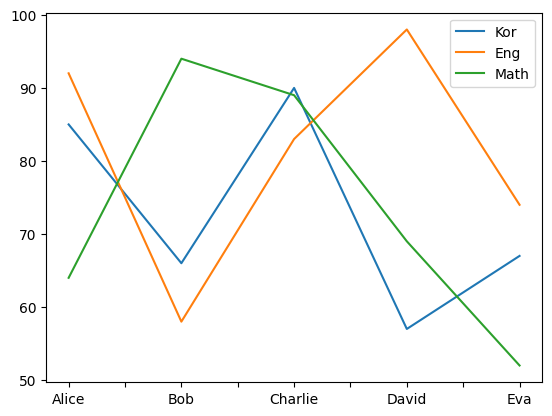

In [145]:
df.plot()

<Axes: >

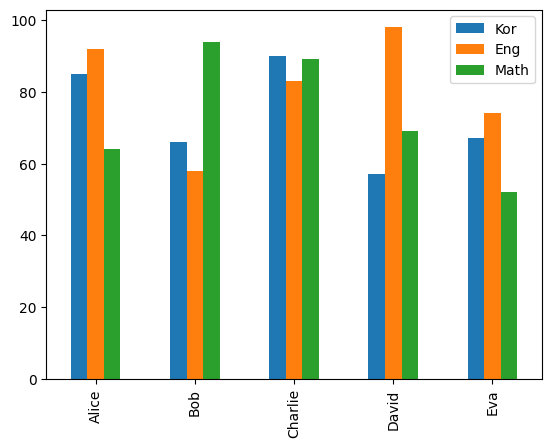

In [146]:
df.plot(kind="bar")

<Axes: >

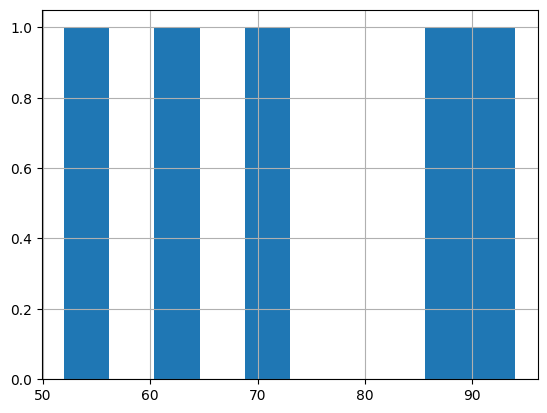

In [147]:
df.Math.hist(bins=10)

<Axes: xlabel='Kor', ylabel='Eng'>

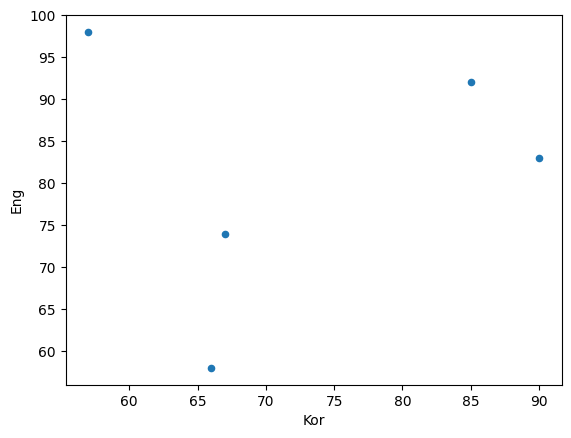

In [148]:
df.plot(kind="scatter", x="Kor", y="Eng")

<Axes: >

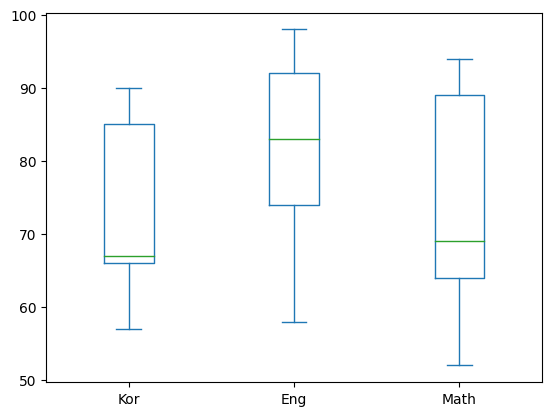

In [149]:
df.plot(kind="box")

<Axes: ylabel='Density'>

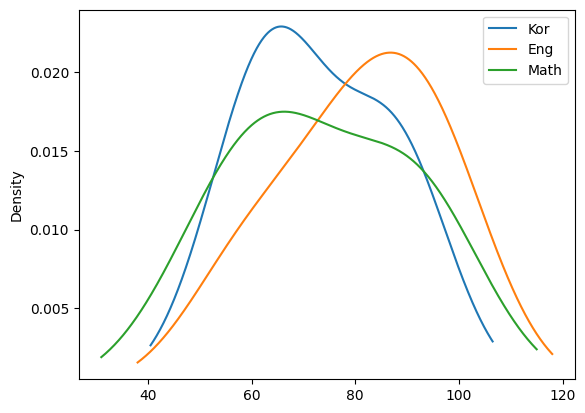

In [150]:
# !pip install scipy
df.plot(kind="kde")

<Axes: ylabel='Math'>

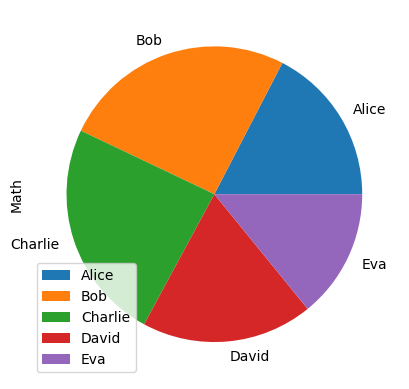

In [151]:
df.plot(kind="pie", y="Math")